## Code 1.1 Crunchbase Analytics

In [18]:
# Loading required libraries
from urllib import parse
import requests
import pandas as pd
import numpy as np
import re

In [ ]:
def create_urlquery_from_args(args):
    url_query = ""
    for k,v in args.items():
        # quote_plus helps us handle special characters like ~_. and spaces
        url_query += '&' + parse.quote_plus(k) + '=' + parse.quote_plus(v)
    return url_query
    

In [7]:
# Setup the basic url for rest api query
API_BASE_URL = 'https://api.crunchbase.com/'
API_VERSION = '3.1' # soon to be updated to v4
API_URL = API_BASE_URL + 'v' + API_VERSION + '/odm-organizations'
API_KEY = "132fae17c64755306c1062a02880406c" #<--- Enter the user key you received from crunchbase

In [9]:
# We are interested in getting organization name and their descriptions
query = 'healthcare' # this will search for keyword 'healthcare' in organization name, it's aliases and short text
param_dict = {"query":query,"organization_types":"company","user_key":API_KEY}
rest_api_url = API_URL + '?' + create_urlquery_from_args(param_dict)

In [11]:
# Making Get Request
headers = {
    'accept': 'application/json',
    'content-type': 'application/json',
  }
resp = requests.get(rest_api_url, headers = headers)

# Checking api call status and seeing few values of the data
if resp.status_code != 200:
    raise ApiError('GET /tasks/ {}'.format(resp.status_code))

# Parsing JSON data
company_data = resp.json()

In [94]:
for items in company_data['data']["items"][:10]:
    print('{} ---> {}'.format(items['properties']['name'], items['properties']['short_description']))
    
# Let us create a dataframe from analysis
data = pd.DataFrame([[items['properties']['name'], items['properties']['short_description']] for items in company_data['data']["items"]], columns = ["name","short_description"])

Medtronic ---> Medtronic develops and manufactures medical device technologies and therapies to treat chronic diseases worldwide.
Change Healthcare ---> Change Healthcare specializes in providing healthcare technology and business support.
Babylon Health ---> Babylon Health aims to provide accessible, affordable healthcare by combining AI with doctors.
One Medical ---> One Medical is a members-only technology platform offering an array of concierge medical services.
Ping An Good Doctor ---> Ping An Good Doctor is an Online-to-offline (O2O) healthcare servicing platform.
MediBuddy ---> MediBuddy is a Trusted Digital Platform for Cashless Healthcare. MediBuddy connects patients with doctors and hospitals.
Xenex ---> Xenex offers Pulsed Xenon Full Spectrum, a UV disinfection solution that reduces the bacterial load associated with the risk for HAIs.
Sift Healthcare ---> Sift transforms healthcare payments with AI-based workflow integrations that optimize revenue cycle operations and maxim

Note there is paging information provided in the paging property of data, hence we can request again to get results of the next page

In [95]:
# plotly library
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib library
import matplotlib.pyplot as plt

#stopwords
from nltk.corpus import stopwords

In [128]:
# Let us remove some frequent words from this domain
common_words = "|".join(["healthcare","medical","service","health","care","ai","data","solution","software","platform","provide","company","technology"])

data["short_description"] = data["short_description"].apply(lambda x: re.sub(common_words,"",x.lower()))
data["short_description"] = data["short_description"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))

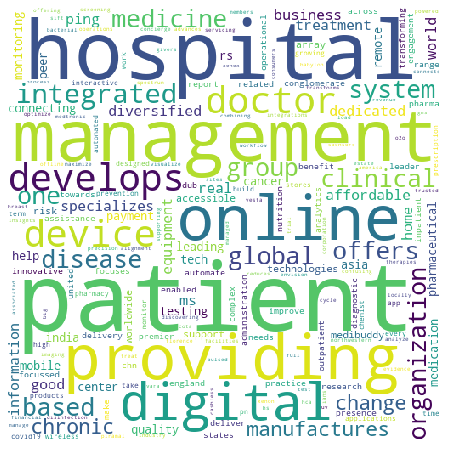

In [129]:
plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 512,
                        ).generate(' '.join(data["short_description"]))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('word_cloud_trend.png')
plt.show()

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf_fit = vectorizer.fit_transform(data["short_description"])

In [125]:
weights = np.asarray(tf_idf_fit.todense().max(axis=0)).ravel().tolist()
words = vectorizer.get_feature_names()
weight_list = {x:y for x,y in zip(words, weights)}


In [126]:
np.asarray(tf_idf_fit.todense().max(axis=0)).ravel().tolist()

[0.3512277422890134,
 0.3257789390446247,
 0.3563061459601922,
 0.3774154629838671,
 0.47553121288077815,
 0.38371390930254223,
 0.3319677369233732,
 0.3222941043418,
 0.31994734081927817,
 0.47553121288077815,
 0.49603069677960254,
 0.35398029447047646,
 0.37550423658944965,
 0.359272990105683,
 0.3594576640129054,
 0.3938889196145241,
 0.4123938897280429,
 0.4242572677647552,
 0.340315140349908,
 0.359272990105683,
 0.4137310755690902,
 0.3995442879573849,
 0.32134482090328953,
 0.33622332414468575,
 0.3664838644474072,
 0.3257789390446247,
 0.3123347573448131,
 0.3310306650688803,
 0.2972403496088286,
 0.35122774228901343,
 0.35745504785491616,
 0.3319677369233732,
 0.41613840775727523,
 0.46080633590379416,
 0.31994734081927817,
 0.37861008751018155,
 0.2721215950645144,
 0.5285011298636431,
 0.3928287980497288,
 0.4780797056740709,
 0.3848879295469557,
 0.30854265764754496,
 0.555338143698122,
 0.6043230432231961,
 0.28981706856170114,
 0.2945500141587181,
 0.4181614501588759,
 0.

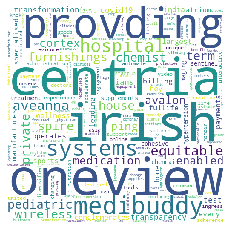

In [127]:
wordcloud.generate_from_frequencies(weight_list)
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('word_cloud_trend.png')
plt.show()